In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

In [2]:
df=pd.read_csv("Final_cleaned.csv")

In [3]:
df.head()

,Unnamed: 0,text,is_sucidal
0,0,when youre so used to feeling anxious that bei...,1
1,1,melania trump doesnt care anymore,0
2,2,son in iraq i killed peopleson dad you were a...,0
3,3,mother fuuuuuuuuuuuuuuuuuuuudies looks like da...,1
4,4,tw suicide \nthis is so sad may he rest well ...,1


In [4]:
new_df=df.sample(1000)

In [5]:
new_df

,Unnamed: 0,text,is_sucidal
10596,10596,people that arent depressed exist and its fuck...,1
2271,2271,when rashford develops a consistent end produc...,1
559,559,terminator judgment day fan screening turned ...,0
4958,4958,i despise when mentally healthy people say go ...,1
5732,5732,canada inquiry finds that deadpool producers ...,0
...,...,...,...
5992,5992,tom hanks to play mr rogers in you are my friend,0
4140,4140,i asked my girlfriend to describe me in words...,0
3364,3364,a man notices his wifes butt is getting bigi b...,0
3288,3288,cabbagebrains it emboldens the people who shar...,1


In [6]:
new_df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
new_df

,text,is_sucidal
10596,people that arent depressed exist and its fuck...,1
2271,when rashford develops a consistent end produc...,1
559,terminator judgment day fan screening turned ...,0
4958,i despise when mentally healthy people say go ...,1
5732,canada inquiry finds that deadpool producers ...,0
...,...,...
5992,tom hanks to play mr rogers in you are my friend,0
4140,i asked my girlfriend to describe me in words...,0
3364,a man notices his wifes butt is getting bigi b...,0
3288,cabbagebrains it emboldens the people who shar...,1


In [8]:
X=new_df['text']
y=new_df['is_sucidal']

In [9]:
import pickle

In [10]:
tokenizer=pickle.load(open("tokenizer.pkl","rb"))

In [11]:
seq_size=400

X=tokenizer.texts_to_sequences(X)



X=keras.preprocessing.sequence.pad_sequences(X,seq_size)

In [12]:
X

array([[   0,    0,    0, ...,   37,  911,  143],
       [   0,    0,    0, ...,   10,  550, 1572],
       [   0,    0,    0, ..., 2875,  503, 3091],
       ...,
       [   0,    0,    0, ...,   51,  198,    1],
       [   0,    0,    0, ...,    6,  643,  420],
       [   0,    0,    0, ...,    0,   20, 4705]])

In [13]:
model=keras.models.load_model("model.h5")

In [14]:
n=model(X)

In [15]:
predected=np.where(n>0.5,1,0)

In [16]:
y=y.values

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
cm=confusion_matrix(y,predected)

In [19]:
cm

array([[469,  11],
       [ 10, 510]], dtype=int64)

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
plt.style.use([ 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid'])

Text(0.5, 1.0, 'Confusion Matrix..')

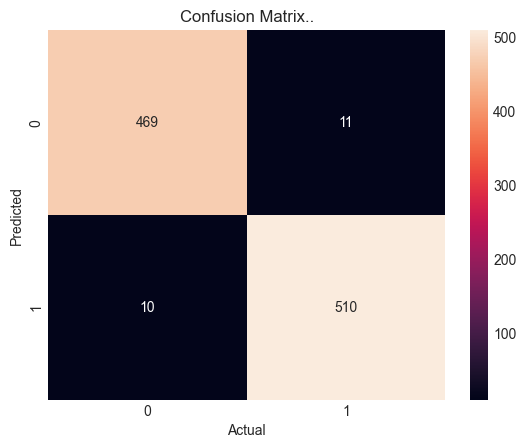

In [28]:
sns.heatmap(cm,annot=True,fmt=".6g")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix..")